In [13]:
import pandas as pd
import nltk
import string
import matplotlib.pyplot as plt

from nltk.corpus import stopwords

In [4]:
stop = stopwords.words('english')
stop.extend(['the','stated','says','interview'])
stop.extend(['january','february','march','april','may','june','july','august','september','october','november','december'])

In [5]:
full = string.punctuation+'’'

In [6]:
def remove_punctuations(text):
    for punctuation in full:
        text = text.replace(punctuation, '')
    return text

In [7]:
df_on = pd.read_csv("data/politifact.csv")

df_on['News_clean'] = df_on['News'].apply(remove_punctuations)

df_on['News_clean'] = df_on['News_clean'].str.lower().apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [8]:
df_on.Rating.unique()

array(['false', 'pants-fire', 'half-true', 'mostly-false', 'mostly-true',
       'true', 'full-flop', 'half-flip', 'no-flip'], dtype=object)

In [9]:
replace = {'false':'false', 'pants-fire':'false', 'half-true':'mixture', 'mostly-false':'mixture', 'mostly-true':'true',
       'true':'true', 'full-flop':'na', 'half-flip':'na', 'no-flip':'na'}

In [10]:
df_on.Rating = df_on.Rating.replace(replace)

In [11]:
df_on = df_on[df_on['Rating']!='na']

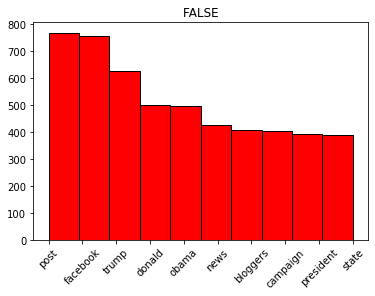

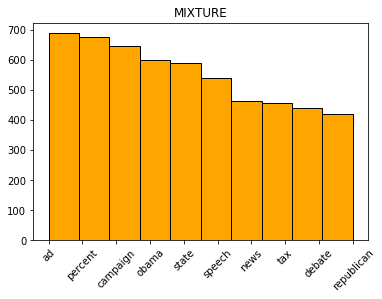

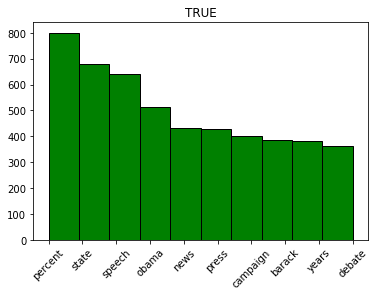

In [36]:
rates = df_on.Rating.unique()
colors = {'false':'red','mixture':'orange','true':'green'}
for rate in rates:
    a = df_on[df_on['Rating']==rate]['News_clean'].str.lower().str.cat(sep=' ')
    words = nltk.tokenize.word_tokenize(a)
    words = [word for word in words if (not word.isnumeric())]
    word_dist = nltk.FreqDist(words)
    rslt = pd.DataFrame(word_dist.most_common(10),
                        columns=['Word', 'Frequency'])
    plt.hist(rslt.Word,weights=rslt.Frequency,color=colors[rate],ec='black')
    plt.title(rate.upper())
    plt.xticks(rotation=45)
    plt.show()